## Australian Energy Market Operator: Price and Demand NSW 10/2023

4032 Observations of 5 minute demand and price action of energy demand in NSW, 2023 10/2023

288 Observations per day = (24 hours * 60 minutes)/5 minutes 



In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats


D:\PythonUOW\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [47]:
# Import Excel file

df=pd.read_csv(r"C:\Users\New User\Desktop\PRICE_AND_DEMAND_202310_NSW1.csv")


In [3]:
#### View data set
print(df.head())

  REGION  SETTLEMENTDATE  TOTALDEMAND    RRP PERIODTYPE
0   NSW1  1/10/2023 0:05      6842.09  58.01      TRADE
1   NSW1  1/10/2023 0:10      6923.79  58.00      TRADE
2   NSW1  1/10/2023 0:15      6933.39  58.00      TRADE
3   NSW1  1/10/2023 0:20      6801.26  54.09      TRADE
4   NSW1  1/10/2023 0:25      6722.11  52.59      TRADE


In [7]:
# Format Date column %d/%m/%y %H:%M
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'], format= "%d/%m/%Y %H:%M")

df.set_index(['SETTLEMENTDATE'],drop=True) # set drop = True to avoid duplicate date column
print(df.head())


  REGION      SETTLEMENTDATE  TOTALDEMAND    RRP PERIODTYPE
0   NSW1 2023-10-01 00:05:00      6842.09  58.01      TRADE
1   NSW1 2023-10-01 00:10:00      6923.79  58.00      TRADE
2   NSW1 2023-10-01 00:15:00      6933.39  58.00      TRADE
3   NSW1 2023-10-01 00:20:00      6801.26  54.09      TRADE
4   NSW1 2023-10-01 00:25:00      6722.11  52.59      TRADE


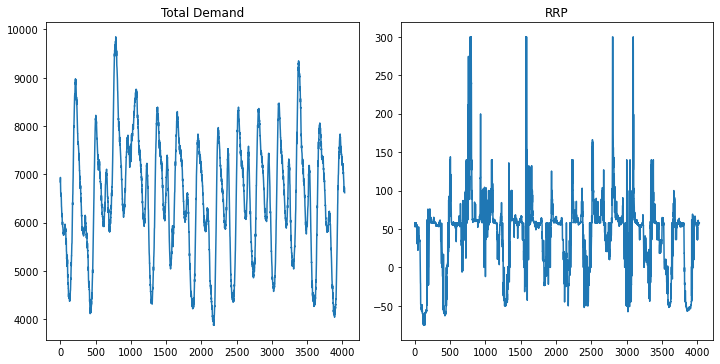

In [8]:
## Visualise Time Series
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
fig.tight_layout()
ax1.plot(df.TOTALDEMAND)
ax1.set_title('Total Demand')
ax2.plot(df.RRP)
ax2.set_title('RRP')
plt.show()

### Total Energy Demand

It is clear by inspection that there is a seasonal component in the data. We say seasonal because the pattern looks extremely repitiive and predictable.

However, it does not appear to contain any trend component, with a majority of the series centered about some mean.

In [ ]:
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

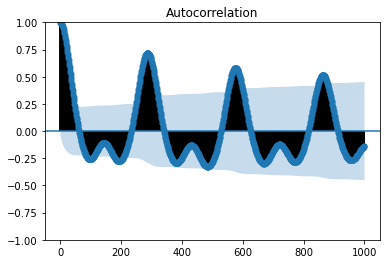

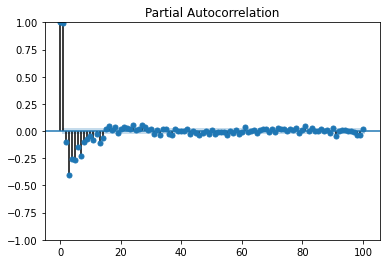

In [19]:
#plot_acf(df.average,lags=100)
#plt.show()

#plot_pacf(df.average,lags=50)
#plt.show()

sm.graphics.tsa.plot_acf(df.TOTALDEMAND,lags=1000)
plt.show()
sm.graphics.tsa.plot_pacf(df.TOTALDEMAND,lags=100)
plt.show()

adf_stat, p, _,_,_,_ = sm.tsa.stattools.adfuller(df.TOTALDEMAND)
print('stat=%.3f, p=%.3f' % (adf_stat, p))
if p > 0.05:
    print('Not Stationary at 0.05 significance level')
else:
    print('stationary at 0.05 significane level')



The ACF has clear oscillatory behaviour. Infact, the peaks are coinciding with a frequency of 288 observations which happens to be, 288 Observations per day = (24 hours * 60 minutes)/5 minutes

This seems expected as we'd expect energy demand to be periodic and repeating itself every day.

The PACF has a very large spike initially, then drops down into a band, with NO signs indicating that the series is not seasonally integrated.



#### The ADF test also reports that the data is stationary at the 0.05 significance level. This is expected since it is not tailored for detecting other forms of nonstationarity outside of a unit root


### Fourier Series ?

Since the data has no discernable trend component, and appears to only contain a seasonal component, rather than attempt to difference the series at 288, = 1 day, we can represent it via Fourier Series

We may also perhaps uncover a some kind of trend, thought this seems unlikely as the data set only covers a month of energy demand data. Perhaps an intra monthly trend or is it rather a random seasonal walk

#### Possible Models

$$ D = c +\alpha sin(\omega t + \theta ) + \beta cos(\omega t + \phi ) $$
$$ D = c + \alpha sin(\omega t + \theta )  $$


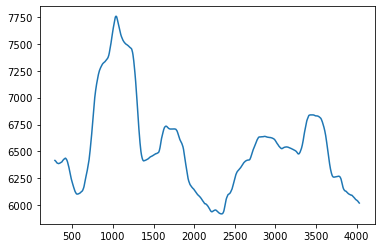

In [50]:
#### Moving Average to see if there is any trend

df['TOTALDEMANDma']=df['TOTALDEMAND'].rolling(window=288).mean()
plt.plot(df['TOTALDEMANDma'])

This isnt surprising as we notice from the original visualisation of the time series it is clear the seasonal component deviates around the mean over time. Though from plotting the moving average, it appears that this deviation is random


In [56]:
from scipy.stats import norm
from scipy.optimize import curve_fit


 Model 1 

c :  6.51e+03  CI ~normally [6.49e+03,6.54e+03]
a :  7.51e+02  CI ~normally [-5.31e+08,5.31e+08]
b :  -4.47e+02  CI ~normally [-4.13e+08,4.13e+08]
theta :  -5.23  CI ~normally [-7.02e+05,7.02e+05]
phi :  30.2  CI ~normally [-1.39e+06,1.39e+06]

 Model 2 

c :  6.51e+03  CI ~normally [6.49e+03,6.54e+03]
a :  7.94e+02  CI ~normally [7.54e+02,8.34e+02]
b :  -7.99e+02  CI ~normally [-8.39e+02,-7.59e+02]


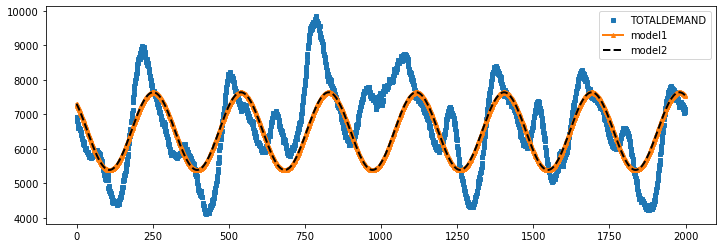

      TOTALDEMAND       model1       model2
0         6842.09  7308.499560  7308.500169
1         6923.79  7290.875954  7290.876489
2         6933.39  7272.882700  7272.883161
3         6801.26  7254.528363  7254.528750
4         6722.11  7235.821679  7235.821990
...           ...          ...          ...
4027      6724.20  7390.785687  7390.786660
4028      6709.20  7375.132478  7375.133379
4029      6711.44  7359.069521  7359.070350
4030      6637.48  7342.604460  7342.605216
4031      6617.92  7325.745132  7325.745814

[4032 rows x 3 columns]


In [103]:
from scipy.stats import norm
from scipy.optimize import curve_fit

demand = df['TOTALDEMAND'].copy(deep=True)
demand = demand.to_frame()


def model1(x,c, a, b, theta, phi):
    omega = 2*np.pi/288
    d_pred = c+  + a*np.cos(omega*x+theta)+b*np.sin(omega*x+phi)
    return d_pred

def model2(x,c, a, b):
    omega = 2*np.pi/288
    d_pred =c+  a*np.cos(omega*x)+b*np.sin(omega*x)
    return d_pred

def RSS(y, d_pred):
    return np.sqrt( (y - d_pred)**2).sum()

  

    
params1, cov1 = curve_fit(model1, xdata = demand.index  , ydata =demand['TOTALDEMAND'], method='lm')

param_list1 = ['c','a', 'b', 'theta', 'phi']
    
print('\n Model 1 \n') 
std_dev = np.sqrt(np.diag(cov1))
for name, p, sd in zip( param_list1, params1, std_dev):
    print('{0} :  {1:0.3}  CI ~normally [{2:0.2e},{3:0.2e}]'.format(name, p, p-1.96*sd,p+1.96*sd))
    
demand['model1'] = model1(demand.index, *params1)



params2, cov2 = curve_fit(model2, xdata = demand.index  , ydata =demand['TOTALDEMAND'], method='lm')

param_list2 = ['c','a', 'b']
    
print('\n Model 2 \n') 
std_dev = np.sqrt(np.diag(cov2))
for name, p, sd in zip( param_list2, params2, std_dev):
    print('{0} :  {1:0.3}  CI ~normally [{2:0.2e},{3:0.2e}]'.format(name, p, p-1.96*sd,p+1.96*sd))
    
demand['model2'] = model2(demand.index, *params2)



demand[:2000].plot(figsize=(12,4), style=['s','^-','k--'] , markersize=4, linewidth=2 )
plt.show()
    

print(demand)


    

## Good fit?

Evident by the visualisation, the models are average at best. They are failing to account for the high peaks and troughs, while also failing to account for the deviations from the mean and deviations from the seasonal component.

It does appear however to get the right shape, though both models do appear to be out of phase slightly

Thus, if we want to account for the deviations from the mean, evident from our moving average plot, and for the greater peaks and amplitudes we require a complex model.



